<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>AI Generated Text Classification Challenge</h1>
</div>

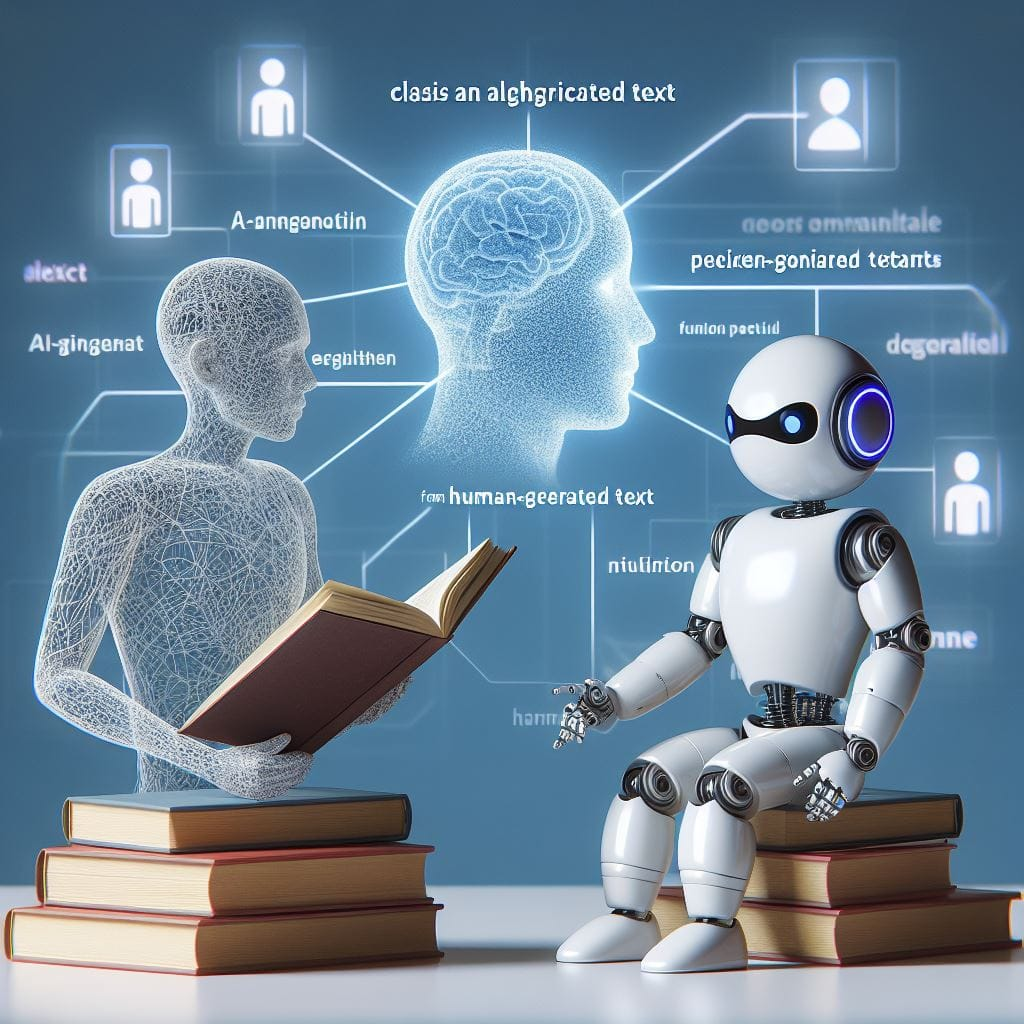
###### Image Credit:- DALL E 3

**Author:-** Aniket B. Barphe
    
**LinkedIn Profile:-** https://www.linkedin.com/in/aniiketbarphe/
        
**Platform:-** BitGrit (01 Nov 2023 to 31 Jan 2024)
    
**Problem Statement:-** Build a machine learning-based approach to classify AI-generated text from human-generated texts

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [19]:
# Data manipulation
import scipy
from scipy.stats import loguniform
import numpy as np
import pandas as pd
import os
from collections import Counter
import platform
import psutil
import cpuinfo

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBRFClassifier

# Model Evaluations
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.utils.class_weight import compute_class_weight
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from feature_engine.selection import SelectBySingleFeaturePerformance
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import (VarianceThreshold
                                       ,f_classif
                                       ,SelectKBest)
# Data Imbalance Techniques
from imblearn.datasets import fetch_datasets
from imblearn.over_sampling import (RandomOverSampler
                                    ,SMOTE,ADASYN
                                    ,BorderlineSMOTE
                                    ,SVMSMOTE)

from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.under_sampling import InstanceHardnessThreshold

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN

from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import (StratifiedKFold,cross_val_predict)

# print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))

# User Defined Functions

# a) BoxPlot:- To check Outliers
def Create_BoxPlotS(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    #fig=plt.figure(figsize=(16,4))
    for i, Feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.boxplot(DataFrame[Feature],ax=ax)   
    fig.tight_layout()  
    plt.show()
    
# b) DistPlot:- To check Normality
def Create_DistPlots(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.distplot(DataFrame[feature],ax=ax)    
    fig.tight_layout()  
    plt.show()

# c) Univariate Analysis of Catagorical Variables
def Univariate_Cat_Features(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.countplot(DataFrame[feature],ax=ax)    
    fig.tight_layout()  
    plt.show()
    
# d) Scatter Plot:- Bivariate Analysis between Target Variable & Independent Variables
# Note:- Pass Target_Variable in Single Quote in this function
def Create_ScatterPlots(DataFrame, Features, Target_Variable, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.scatterplot(DataFrame[feature],DataFrame[Target_Variable],ax=ax)  
    fig.tight_layout()  
    plt.show()

# e) Joint Plot:- Bivariate Analysis between Target Variable & Independent Variables
# Note:- Pass Target_Variable in Single Quote in this function
def Create_JointPlots(DataFrame, Features, Target_Variable):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        sns.jointplot(y= Target_Variable, x= DataFrame[feature], data = DataFrame,kind='reg')
    fig.tight_layout()  
    plt.show()

# f) Check Feature wise Outliers   
def Check_Outliers(DataFrame, Column_List):
    for column in Column_List:    
        q1 = DataFrame[column].quantile(0.25)    # First Quartile
        q3 = DataFrame[column].quantile(0.75)    # Third Quartile
        IQR = q3 - q1                            # Inter Quartile Range
        llimit = q1 - 1.5*IQR                    # Lower Limit
        ulimit = q3 + 1.5*IQR                    # Upper Limit
        outliers = DataFrame[(DataFrame[column] < llimit) | (DataFrame[column] > ulimit)]
        print('\nNumber of outliers in "' + column + '" :' + str(len(outliers)))
        print('\nLower Limit in "' + column + '" :',llimit)
        print('\nUpper Limit in "' + column + '" :',ulimit)
        print('\nInter Quartile Range of "' + column + '" :',IQR,"\n")

# g) Label Encoding   
def Label_Encoder(DataFrame):
    le = LabelEncoder()
    for col in DataFrame.columns:
        if(DataFrame[col].dtype == 'object'):
            DataFrame.loc[:,col] = le.fit_transform(DataFrame.loc[:,col])
            
# h) Environment Details
            
def print_environment_details():
    # Operating System details
    os_details = platform.uname()

    # Memory (RAM) details
    memory_details = psutil.virtual_memory()

    # Disk space details
    disk_details = psutil.disk_usage('/')

    # CPU details
    cpu_details = cpuinfo.get_cpu_info()

    # Print the information
    print("\nOperating System Details:")
    print(f"  1) System: {os_details.system}")
    print(f"  2) Node Name: {os_details.node}")
    print(f"  3) Release: {os_details.release}")
    print(f"  4) Version: {os_details.version}")
    print(f"  5) Machine: {os_details.machine}")
    print(f"  6) Processor: {os_details.processor}")

    print("\nMemory (RAM) Details:")
    print(f"  1) Total Memory: {memory_details.total / (1024 ** 3):.2f} GB")
    print(f"  2) Available Memory: {memory_details.available / (1024 ** 3):.2f} GB")

    print("\nDisk Space Details:")
    print(f"  1) Total Disk Space: {disk_details.total / (1024 ** 3):.2f} GB")
    print(f"  2) Free Disk Space: {disk_details.free / (1024 ** 3):.2f} GB")
    print(f"  3) Used Disk Space: {disk_details.used / (1024 ** 3):.2f} GB")

    print("\nCPU Details:")
    print(f"  1) Processor Name: {cpu_details['brand_raw']}")
    print(f"  2) Architecture: {cpu_details['arch']}")
    print(f"  3) Cores: {psutil.cpu_count(logical=False)} (Physical)")
    print(f"  4) Threads: {psutil.cpu_count(logical=True)} (Logical)")
    
# Call the function to print environment details
print_environment_details()

CatBoost version 1.2.2
NumPy version 1.24.3
Pandas version 1.5.3
seaborn version 0.12.2
sklearn version 1.2.2
xgboost version 2.0.3
lightgbm version 4.2.0

Operating System Details:
  1) System: Windows
  2) Node Name: AniiketBarphe
  3) Release: 10
  4) Version: 10.0.22621
  5) Machine: AMD64
  6) Processor: Intel64 Family 6 Model 186 Stepping 2, GenuineIntel

Memory (RAM) Details:
  1) Total Memory: 15.65 GB
  2) Available Memory: 5.78 GB

Disk Space Details:
  1) Total Disk Space: 246.49 GB
  2) Free Disk Space: 147.89 GB
  3) Used Disk Space: 98.60 GB

CPU Details:
  1) Processor Name: 13th Gen Intel(R) Core(TM) i7-1360P
  2) Architecture: X86_64
  3) Cores: 12 (Physical)
  4) Threads: 16 (Logical)


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Train" data in "train" Variable 
- Read & Load "Test" data in "test" Variable
- Read & Load "Solution_Format" in "sub" Variable

In [20]:
path = r'C:\Users\abdat\Favorites\Hackathon\BTGT\Text-Classify-Challenge-Nov23-Jan24\DATASET'
train = pd.read_csv(os.path.join(path, 'training_set.csv'))
test = pd.read_csv(os.path.join(path, 'test_set.csv'))
sub = pd.read_csv(os.path.join(path, 'solution_format.csv'))

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 
- Check Unique Entries in Train Dataset 
- Check Unique Entries in Test Dataset

In [21]:
print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print('-------------'*9)

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print('-------------'*9)

print("\nData Types in Solution_Format:-\n")
print(sub.info(),'\n')

print("\nShape of Solution_Format:-\n")
print(sub.shape,'\n')

print('-------------'*9)

Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Columns: 772 entries, ID to ind
dtypes: float64(768), int64(4)
memory usage: 65.6 MB
None 

Shape of Train Data:-

(11144, 772) 

---------------------------------------------------------------------------------------------------------------------

Data Types in Test Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786 entries, 0 to 2785
Columns: 771 entries, ID to punc_num
dtypes: float64(768), int64(3)
memory usage: 16.4 MB
None 


Shape of Test Data:-

(2786, 771) 

---------------------------------------------------------------------------------------------------------------------

Data Types in Solution_Format:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786 entries, 0 to 2785
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      2786 non-null   int64
 1   ind     2786 non-null   int64
dtypes: int64(

In [22]:
print("About Train Data:-\n")
print(train.head(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print('-------------'*9)

print("\nAbout Solution_Format:-\n")
print(sub.head(),'\n')
print('-------------'*9)

About Train Data:-

   ID  feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   1   0.231980  -0.190620  -0.985933  -0.233773  -0.355879  -0.488884   
1   2   0.168223  -1.204551  -0.596952  -0.722583   0.284799  -0.238639   
2   3   0.522005  -0.759933  -1.209413   0.301834   0.361126   0.158161   
3   4   0.038746  -1.408335  -0.580810   0.353450   1.142353  -0.418879   
4   5  -0.307572   0.103575  -0.368605  -0.378654  -0.285990  -0.508058   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0   0.254773  -0.121213  -0.820528  -1.161955    0.250490    0.309828   
1  -0.410948  -0.090654   1.220703  -1.157622    0.156480    1.778788   
2  -0.117013   0.313158   1.102455  -1.646261    0.045085    1.043667   
3  -0.134133  -0.199796   1.071100  -1.609315    0.167731    2.161729   
4  -0.254869  -0.108291  -0.095139  -1.745294   -1.037561    0.472800   

   feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
0    0.285233

   ID  feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   1   0.233878  -0.575866  -0.817383  -1.308944   0.203170  -0.151178   
1   2  -0.378112   0.019394  -0.261695  -0.213910  -0.339688  -0.440592   
2   3  -0.971502  -0.624442  -0.244309  -0.227205  -0.290587   0.235740   
3   4   0.206271  -0.234456  -0.275528   0.724101  -0.734225  -1.006453   
4   5  -0.281816  -0.314982  -0.386653  -0.582492  -0.331799  -0.366927   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0  -0.377259  -0.167252   0.260954  -1.424165   -0.167867    1.999264   
1  -0.247194  -0.134335  -0.160141  -1.780667   -1.047064    0.455856   
2   0.334917  -0.306881   0.188613  -0.297005   -0.317197    1.161374   
3  -0.140558  -0.190625  -0.465205  -0.698818   -0.077844    0.866875   
4  -0.467231  -0.313802   0.383410  -1.686447   -0.979080    0.703618   

   feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
0   -0.359936    1.678233    0.43

In [23]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print('-------------'*9)

print("\nAbout Solution_Format:-\n")
print(sub.tail(),'\n')
print('-------------'*9)

About Train Data:-

          ID  feature_0  feature_1  feature_2  feature_3  feature_4  \
11139  11140   0.388275  -0.776383  -1.236468  -0.090159   0.013522   
11140  11141   0.096468  -0.810038  -0.847827  -1.130093  -0.575835   
11141  11142  -0.277712  -0.822547  -0.788966  -0.783690   0.605847   
11142  11143   0.388307  -0.267300  -0.873434  -0.309149  -0.403474   
11143  11144  -0.126590  -0.904643  -0.559367  -1.498097   0.069002   

       feature_5  feature_6  feature_7  feature_8  feature_9  feature_10  \
11139  -0.337909   0.057852  -0.301914   0.062450  -1.060892   -0.034088   
11140  -0.792116  -0.358161  -0.007668  -0.041767  -0.931957   -0.477533   
11141  -0.232772  -0.269033   0.057341   0.272056  -1.157438    0.417270   
11142  -0.279639  -0.053389   0.129763  -0.021183  -1.397921   -0.410238   
11143  -0.144790   0.197125  -0.112849   0.450241  -1.213955   -0.859416   

       feature_11  feature_12  feature_13  feature_14  feature_15  feature_16  \
11139    1.1288

        ID  feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
2781  2782   0.334125  -0.059505  -0.782443  -0.567222  -0.285653  -0.230294   
2782  2783   0.308119  -0.254781  -0.655044   0.372621  -0.306286  -0.607703   
2783  2784   0.232611   0.076624  -0.846159  -0.684437  -0.171275  -0.475552   
2784  2785  -0.767239  -0.211249  -0.591609  -0.059457  -0.389209  -1.235679   
2785  2786  -0.159082  -0.237704  -0.475419  -0.380346   0.084157   0.060679   

      feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
2781  -0.111070  -0.145003  -0.186990  -0.598659   -0.126965    0.635401   
2782   0.117155  -0.092609  -0.005938  -0.743539   -0.291756    0.468198   
2783   0.277890  -0.204045  -0.538907  -1.094565   -0.581901    1.415177   
2784   0.098283  -0.234968   0.430002  -2.217934   -0.158041    0.858879   
2785   0.010683   0.360935   0.422707  -1.517039    0.187209    1.230357   

      feature_12  feature_13  feature_14  feature_15  feature_

In [24]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,feature_257,feature_258,feature_259,feature_260,feature_261,feature_262,feature_263,feature_264,feature_265,feature_266,feature_267,feature_268,feature_269,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_278,feature_279,feature_280,feature_281,feature_282,feature_283,feature_284,feature_285,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,feature_311,feature_312,feature_313,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320,feature_321,feature_322,feature_323,feature_324,feature_325,feature_326,feature_327,feature_328,feature_329,feature_330,feature_331,feature_332,feature_333,feature_334,feature_335,feature_336,feature_337,feature_338,feature_339,feature_340,feature_341,fe

In [25]:
test.describe(include='all')
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,feature_257,feature_258,feature_259,feature_260,feature_261,feature_262,feature_263,feature_264,feature_265,feature_266,feature_267,feature_268,feature_269,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_278,feature_279,feature_280,feature_281,feature_282,feature_283,feature_284,feature_285,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,feature_311,feature_312,feature_313,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320,feature_321,feature_322,feature_323,feature_324,feature_325,feature_326,feature_327,feature_328,feature_329,feature_330,feature_331,feature_332,feature_333,feature_334,feature_335,feature_336,feature_337,feature_338,feature_339,feature_340,feature_341,fe

In [26]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum()
                                   ,train.isnull().sum()*100/len(train))
                               ,columns=['Missing Values'
                                         ,'Percentage Missing Values']
                               ,index=train.columns)
missing_val_train

Checking Null entries & their Percentage in Train Data:-




,Missing Values,Percentage Missing Values
ID,0,0.0
feature_0,0,0.0
feature_1,0,0.0
feature_2,0,0.0
feature_3,0,0.0
feature_4,0,0.0
feature_5,0,0.0
feature_6,0,0.0
feature_7,0,0.0
feature_8,0,0.0


In [27]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum()
                                  ,test.isnull().sum()*100/len(test))
                              ,columns=['Missing Values'
                                        ,'Percentage Missing Values']
                              ,index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




,Missing Values,Percentage Missing Values
ID,0,0.0
feature_0,0,0.0
feature_1,0,0.0
feature_2,0,0.0
feature_3,0,0.0
feature_4,0,0.0
feature_5,0,0.0
feature_6,0,0.0
feature_7,0,0.0
feature_8,0,0.0


In [28]:
# Checking Unique entries in Train Data
listItem = []
for col in train.columns :
    listItem.append( [col
                      , train[col].nunique()
                      , train[col].unique()])

train_unique = pd.DataFrame(columns=['Column_Name'
                                     , 'Number_of_Unique_Values'
                                     , 'Unique_Sample'],
                     data=listItem)
print("Unique entries in Train Data are :-\n\n")
print('-------------'*9)
train_unique

Unique entries in Train Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,ID,11144,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,feature_0,11143,"[0.23198001, 0.16822332, 0.52200484, 0.0387455..."
2,feature_1,11143,"[-0.19061984, -1.2045507, -0.7599327, -1.40833..."
3,feature_2,11143,"[-0.9859327, -0.5969524, -1.2094133, -0.580809..."
4,feature_3,11144,"[-0.233773, -0.72258323, 0.30183437, 0.3534497..."
5,feature_4,11142,"[-0.35587928, 0.28479898, 0.36112604, 1.142353..."
6,feature_5,11139,"[-0.48888364, -0.23863865, 0.15816136, -0.4188..."
7,feature_6,11140,"[0.25477284, -0.41094834, -0.11701273, -0.1341..."
8,feature_7,11144,"[-0.12121274, -0.09065448, 0.31315762, -0.1997..."
9,feature_8,11144,"[-0.8205285, 1.2207028, 1.1024553, 1.0711002, ..."


In [29]:
# Checking Unique entries in Test Data
listItem = []
for col in test.columns :
    listItem.append( [col
                      , test[col].nunique()
                      , test[col].unique()])

test_unique = pd.DataFrame(columns=['Column_Name'
                                    , 'Number_of_Unique_Values'
                                    , 'Unique_Sample'],
                     data=listItem)
print("Unique entries in Test Data are :-\n\n")
print('-------------'*9)
test_unique

Unique entries in Test Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,ID,2786,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,feature_0,2786,"[0.23387752, -0.37811193, -0.97150224, 0.20627..."
2,feature_1,2786,"[-0.5758661, 0.019393578, -0.6244417, -0.23445..."
3,feature_2,2786,"[-0.8173825, -0.26169494, -0.24430928, -0.2755..."
4,feature_3,2786,"[-1.3089435, -0.21391007, -0.22720489, 0.72410..."
5,feature_4,2786,"[0.20317023, -0.33968815, -0.2905872, -0.73422..."
6,feature_5,2786,"[-0.1511785, -0.44059223, 0.23574013, -1.00645..."
7,feature_6,2786,"[-0.37725893, -0.24719359, 0.3349166, -0.14055..."
8,feature_7,2786,"[-0.16725187, -0.13433468, -0.30688098, -0.190..."
9,feature_8,2786,"[0.2609539, -0.16014141, 0.18861258, -0.465204..."


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about "Train" Data


In [30]:
# Segregation of Numerical Columns from Train Data
num_cols_train = train.select_dtypes(['int64'
                                      ,'float64']).columns
print("Shape of Numerical Features in Train data is:-\n\n"
      ,num_cols_train.shape)
print("Numerical Columns in Train Data are :-\n\n")
print(num_cols_train)
print('-------------'*9)

# Segregation of Catagorical Columns from Train Data
cat_cols_train = train.select_dtypes(['object']).columns
print("Shape of Catagorical Features in Train data is:-\n\n"
      ,cat_cols_train.shape)
print("Catagorical Columns in Train Data are :-\n\n")
print(cat_cols_train)
print('-------------'*9)

Shape of Numerical Features in Train data is:-

 (772,)
Numerical Columns in Train Data are :-


Index(['ID', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8',
       ...
       'feature_761', 'feature_762', 'feature_763', 'feature_764',
       'feature_765', 'feature_766', 'feature_767', 'word_count', 'punc_num',
       'ind'],
      dtype='object', length=772)
---------------------------------------------------------------------------------------------------------------------
Shape of Catagorical Features in Train data is:-

 (0,)
Catagorical Columns in Train Data are :-


Index([], dtype='object')
---------------------------------------------------------------------------------------------------------------------


Checking distribution of target variable


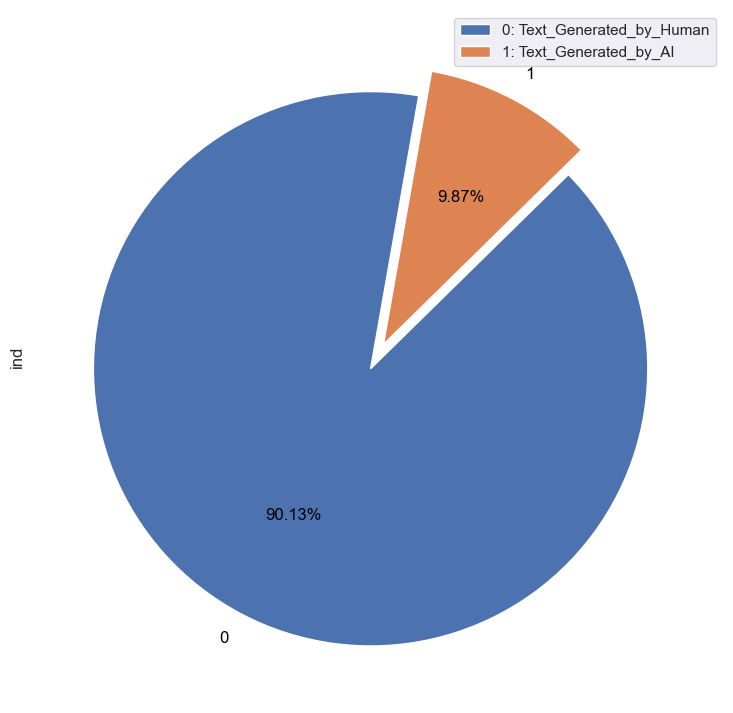

In [31]:
# Evaluate the class balance within the distribution of Target_Variable
print("Checking distribution of target variable")
train.ind.value_counts().plot(kind='pie'
                              ,subplots=True
                              ,autopct='%1.2f%%'
                              ,explode= (0.05, 0.05)
                              ,startangle=80
                              ,legend=True
                              ,fontsize=12
                              ,figsize=(14,9)
                              ,textprops={'color':"black"})
plt.legend(["0: Text_Generated_by_Human"
            ,"1: Text_Generated_by_AI "]);

In [32]:
# Calculate Class_Weight of Target_Variable
y_original1 = train['ind']
class_weights1 = compute_class_weight(class_weight='balanced'
                                      , classes=np.unique(y_original1)
                                      , y=y_original1)
print("Class Weights of Target Variable:", class_weights1)
print('-------------'*9)

Class Weights of Target Variable: [0.55475906 5.06545455]
---------------------------------------------------------------------------------------------------------------------


In [33]:
# Check Outliers in the Train Dataset
Check_Outliers(train,num_cols_train)


Number of outliers in "ID" :0

Lower Limit in "ID" : -5570.5

Upper Limit in "ID" : 16715.5

Inter Quartile Range of "ID" : 5571.5 


Number of outliers in "feature_0" :77

Lower Limit in "feature_0" : -0.90723163125

Upper Limit in "feature_0" : 1.21387595875

Inter Quartile Range of "feature_0" : 0.5302768975 


Number of outliers in "feature_1" :122

Lower Limit in "feature_1" : -1.2684086095000002

Upper Limit in "feature_1" : 0.7345797225

Inter Quartile Range of "feature_1" : 0.500747083 


Number of outliers in "feature_2" :109

Lower Limit in "feature_2" : -1.8146565875

Upper Limit in "feature_2" : 0.4780959124999999

Inter Quartile Range of "feature_2" : 0.5731881249999999 


Number of outliers in "feature_3" :123

Lower Limit in "feature_3" : -2.34593433125

Upper Limit in "feature_3" : 1.5330138587500002

Inter Quartile Range of "feature_3" : 0.9697370475 


Number of outliers in "feature_4" :50

Lower Limit in "feature_4" : -1.8363241375

Upper Limit in "feature_4" : 1.37


Number of outliers in "feature_77" :93

Lower Limit in "feature_77" : -1.262737923875

Upper Limit in "feature_77" : 0.708815853125

Inter Quartile Range of "feature_77" : 0.49288844425 


Number of outliers in "feature_78" :43

Lower Limit in "feature_78" : -1.20499969625

Upper Limit in "feature_78" : 1.64081159375

Inter Quartile Range of "feature_78" : 0.7114528225000001 


Number of outliers in "feature_79" :112

Lower Limit in "feature_79" : -0.85098781625

Upper Limit in "feature_79" : 1.0489525737499998

Inter Quartile Range of "feature_79" : 0.47498509749999995 


Number of outliers in "feature_80" :130

Lower Limit in "feature_80" : -1.06768053125

Upper Limit in "feature_80" : 0.84981501875

Inter Quartile Range of "feature_80" : 0.4793738875 


Number of outliers in "feature_81" :107

Lower Limit in "feature_81" : -0.7032878612500001

Upper Limit in "feature_81" : 1.82560804875

Inter Quartile Range of "feature_81" : 0.6322239775 


Number of outliers in "feature_82" :147



Number of outliers in "feature_152" :104

Lower Limit in "feature_152" : -0.78216445625

Upper Limit in "feature_152" : 0.9953252537499999

Inter Quartile Range of "feature_152" : 0.4443724275 


Number of outliers in "feature_153" :190

Lower Limit in "feature_153" : -0.2945570374999999

Upper Limit in "feature_153" : 1.6937338425

Inter Quartile Range of "feature_153" : 0.49707271999999997 


Number of outliers in "feature_154" :89

Lower Limit in "feature_154" : -0.06602636250000005

Upper Limit in "feature_154" : 1.7210191375000001

Inter Quartile Range of "feature_154" : 0.446761375 


Number of outliers in "feature_155" :54

Lower Limit in "feature_155" : -0.9905518225

Upper Limit in "feature_155" : 1.2305523975

Inter Quartile Range of "feature_155" : 0.555276055 


Number of outliers in "feature_156" :121

Lower Limit in "feature_156" : -1.7543042737500003

Upper Limit in "feature_156" : 0.27555491625000017

Inter Quartile Range of "feature_156" : 0.5074647975000001 


Number


Number of outliers in "feature_233" :261

Lower Limit in "feature_233" : -1.002345075

Upper Limit in "feature_233" : 1.897277925

Inter Quartile Range of "feature_233" : 0.72490575 


Number of outliers in "feature_234" :32

Lower Limit in "feature_234" : -3.6034703925

Upper Limit in "feature_234" : 3.4659163875

Inter Quartile Range of "feature_234" : 1.767346695 


Number of outliers in "feature_235" :52

Lower Limit in "feature_235" : -1.2644197693750001

Upper Limit in "feature_235" : 2.0602304616250002

Inter Quartile Range of "feature_235" : 0.83116255775 


Number of outliers in "feature_236" :106

Lower Limit in "feature_236" : -1.20214503625

Upper Limit in "feature_236" : 1.21697045375

Inter Quartile Range of "feature_236" : 0.6047788725 


Number of outliers in "feature_237" :167

Lower Limit in "feature_237" : 0.006419443749999809

Upper Limit in "feature_237" : 1.7646347737500003

Inter Quartile Range of "feature_237" : 0.43955383250000013 


Number of outliers in "fea


Number of outliers in "feature_311" :68

Lower Limit in "feature_311" : -2.3937128674999997

Upper Limit in "feature_311" : 1.0772721124999998

Inter Quartile Range of "feature_311" : 0.867746245 


Number of outliers in "feature_312" :122

Lower Limit in "feature_312" : -0.9282501925

Upper Limit in "feature_312" : 0.9503016874999999

Inter Quartile Range of "feature_312" : 0.46963796999999996 


Number of outliers in "feature_313" :168

Lower Limit in "feature_313" : -0.09592821374999994

Upper Limit in "feature_313" : 1.30671851625

Inter Quartile Range of "feature_313" : 0.35066168249999996 


Number of outliers in "feature_314" :147

Lower Limit in "feature_314" : -0.7387087125

Upper Limit in "feature_314" : 1.7489400275

Inter Quartile Range of "feature_314" : 0.621912185 


Number of outliers in "feature_315" :159

Lower Limit in "feature_315" : 0.2346589124999997

Upper Limit in "feature_315" : 1.6492606525000004

Inter Quartile Range of "feature_315" : 0.35365043500000015 




Number of outliers in "feature_355" :118

Lower Limit in "feature_355" : -0.71188086625

Upper Limit in "feature_355" : 0.69409080375

Inter Quartile Range of "feature_355" : 0.3514929175 


Number of outliers in "feature_356" :11

Lower Limit in "feature_356" : -1.6367952950000002

Upper Limit in "feature_356" : 1.4809432650000003

Inter Quartile Range of "feature_356" : 0.7794346400000001 


Number of outliers in "feature_357" :38

Lower Limit in "feature_357" : -1.0539293937499998

Upper Limit in "feature_357" : 1.95323401625

Inter Quartile Range of "feature_357" : 0.7517908525 


Number of outliers in "feature_358" :69

Lower Limit in "feature_358" : -0.7472223250000001

Upper Limit in "feature_358" : 1.596595035

Inter Quartile Range of "feature_358" : 0.58595434 


Number of outliers in "feature_359" :82

Lower Limit in "feature_359" : -1.2254192072499999

Upper Limit in "feature_359" : 0.65413167875

Inter Quartile Range of "feature_359" : 0.4698877215 


Number of outliers in


Number of outliers in "feature_405" :39

Lower Limit in "feature_405" : -0.2953097562499999

Upper Limit in "feature_405" : 1.9967361337499998

Inter Quartile Range of "feature_405" : 0.5730114725 


Number of outliers in "feature_406" :92

Lower Limit in "feature_406" : -0.8508665612499999

Upper Limit in "feature_406" : 1.2295248887499999

Inter Quartile Range of "feature_406" : 0.5200978625 


Number of outliers in "feature_407" :97

Lower Limit in "feature_407" : -1.12927091

Upper Limit in "feature_407" : 1.50405185

Inter Quartile Range of "feature_407" : 0.65833069 


Number of outliers in "feature_408" :83

Lower Limit in "feature_408" : -1.4911019075

Upper Limit in "feature_408" : 0.6868241725

Inter Quartile Range of "feature_408" : 0.54448152 


Number of outliers in "feature_409" :95

Lower Limit in "feature_409" : -1.3751041000000002

Upper Limit in "feature_409" : 1.7364545000000002

Inter Quartile Range of "feature_409" : 0.7778896500000001 


Number of outliers in "fe


Number of outliers in "feature_447" :61

Lower Limit in "feature_447" : -0.6097814474999999

Upper Limit in "feature_447" : 1.8505751725

Inter Quartile Range of "feature_447" : 0.6150891549999999 


Number of outliers in "feature_448" :160

Lower Limit in "feature_448" : -0.51331581875

Upper Limit in "feature_448" : 1.55840085125

Inter Quartile Range of "feature_448" : 0.5179291675 


Number of outliers in "feature_449" :76

Lower Limit in "feature_449" : -0.6247325875

Upper Limit in "feature_449" : 1.9004534925

Inter Quartile Range of "feature_449" : 0.63129652 


Number of outliers in "feature_450" :151

Lower Limit in "feature_450" : -1.061727880125

Upper Limit in "feature_450" : 0.717469446875

Inter Quartile Range of "feature_450" : 0.44479933175 


Number of outliers in "feature_451" :66

Lower Limit in "feature_451" : -1.4979749162499998

Upper Limit in "feature_451" : 1.6313576737499997

Inter Quartile Range of "feature_451" : 0.7823331474999999 


Number of outliers in 


Number of outliers in "feature_489" :76

Lower Limit in "feature_489" : -0.21393058750000016

Upper Limit in "feature_489" : 1.9774927125000001

Inter Quartile Range of "feature_489" : 0.5478558250000001 


Number of outliers in "feature_490" :141

Lower Limit in "feature_490" : -0.03467705624999995

Upper Limit in "feature_490" : 1.8943273537499998

Inter Quartile Range of "feature_490" : 0.4822511024999999 


Number of outliers in "feature_491" :111

Lower Limit in "feature_491" : -0.949558151875

Upper Limit in "feature_491" : 0.590556513125

Inter Quartile Range of "feature_491" : 0.38502866625 


Number of outliers in "feature_492" :46

Lower Limit in "feature_492" : -1.2355866500000001

Upper Limit in "feature_492" : 1.86059631

Inter Quartile Range of "feature_492" : 0.77404574 


Number of outliers in "feature_493" :197

Lower Limit in "feature_493" : -0.7298128219375001

Upper Limit in "feature_493" : 1.2029523491625

Inter Quartile Range of "feature_493" : 0.483191292775 





Number of outliers in "feature_531" :50

Lower Limit in "feature_531" : -1.5083761612500002

Upper Limit in "feature_531" : 0.56482146875

Inter Quartile Range of "feature_531" : 0.5182994075 


Number of outliers in "feature_532" :125

Lower Limit in "feature_532" : -0.8498057587500001

Upper Limit in "feature_532" : 1.66844473525

Inter Quartile Range of "feature_532" : 0.6295626235 


Number of outliers in "feature_533" :64

Lower Limit in "feature_533" : -1.5339707599999999

Upper Limit in "feature_533" : 1.13395356

Inter Quartile Range of "feature_533" : 0.66698108 


Number of outliers in "feature_534" :104

Lower Limit in "feature_534" : -2.48727239875

Upper Limit in "feature_534" : 2.15735867125

Inter Quartile Range of "feature_534" : 1.1611577675 


Number of outliers in "feature_535" :127

Lower Limit in "feature_535" : -1.13509237125

Upper Limit in "feature_535" : 1.3498933187500002

Inter Quartile Range of "feature_535" : 0.6212464225000001 


Number of outliers in "fe


Number of outliers in "feature_578" :128

Lower Limit in "feature_578" : -2.4447370375000004

Upper Limit in "feature_578" : 0.06280086250000017

Inter Quartile Range of "feature_578" : 0.6268844750000001 


Number of outliers in "feature_579" :44

Lower Limit in "feature_579" : -1.7036920362499997

Upper Limit in "feature_579" : 2.5532067337499997

Inter Quartile Range of "feature_579" : 1.0642246924999998 


Number of outliers in "feature_580" :171

Lower Limit in "feature_580" : -0.66590198125

Upper Limit in "feature_580" : 1.77575694875

Inter Quartile Range of "feature_580" : 0.6104147325 


Number of outliers in "feature_581" :45

Lower Limit in "feature_581" : -0.32232228124999995

Upper Limit in "feature_581" : 1.50583766875

Inter Quartile Range of "feature_581" : 0.45703998749999997 


Number of outliers in "feature_582" :155

Lower Limit in "feature_582" : -0.9587509537500001

Upper Limit in "feature_582" : 1.29094645625

Inter Quartile Range of "feature_582" : 0.562424352


Number of outliers in "feature_621" :110

Lower Limit in "feature_621" : -0.9932498075

Upper Limit in "feature_621" : 1.3849797405

Inter Quartile Range of "feature_621" : 0.594557387 


Number of outliers in "feature_622" :182

Lower Limit in "feature_622" : -1.02427838625

Upper Limit in "feature_622" : 1.01454158375

Inter Quartile Range of "feature_622" : 0.5097049925 


Number of outliers in "feature_623" :234

Lower Limit in "feature_623" : -1.11345896125

Upper Limit in "feature_623" : 1.2528840887500001

Inter Quartile Range of "feature_623" : 0.5915857625000001 


Number of outliers in "feature_624" :71

Lower Limit in "feature_624" : -0.6116174550000001

Upper Limit in "feature_624" : 1.195308013

Inter Quartile Range of "feature_624" : 0.45173136700000005 


Number of outliers in "feature_625" :149

Lower Limit in "feature_625" : -1.33659683125

Upper Limit in "feature_625" : 0.28397531875000004

Inter Quartile Range of "feature_625" : 0.4051430375 


Number of outliers in


Number of outliers in "feature_665" :94

Lower Limit in "feature_665" : -0.98335869625

Upper Limit in "feature_665" : 0.75295673375

Inter Quartile Range of "feature_665" : 0.4340788575 


Number of outliers in "feature_666" :94

Lower Limit in "feature_666" : -1.1955305175000002

Upper Limit in "feature_666" : 1.0264615625000002

Inter Quartile Range of "feature_666" : 0.55549802 


Number of outliers in "feature_667" :182

Lower Limit in "feature_667" : -0.14346644375

Upper Limit in "feature_667" : 1.3097519062499998

Inter Quartile Range of "feature_667" : 0.3633045875 


Number of outliers in "feature_668" :153

Lower Limit in "feature_668" : -0.3543147750000001

Upper Limit in "feature_668" : 1.100903245

Inter Quartile Range of "feature_668" : 0.36380450500000006 


Number of outliers in "feature_669" :190

Lower Limit in "feature_669" : -0.9631772274999999

Upper Limit in "feature_669" : 1.0198905525

Inter Quartile Range of "feature_669" : 0.49576694499999996 


Number of ou


Number of outliers in "feature_707" :58

Lower Limit in "feature_707" : -1.1206371618750002

Upper Limit in "feature_707" : 1.797125817125

Inter Quartile Range of "feature_707" : 0.72944074475 


Number of outliers in "feature_708" :150

Lower Limit in "feature_708" : -0.6015013562500002

Upper Limit in "feature_708" : 2.0562456137500003

Inter Quartile Range of "feature_708" : 0.6644367425000002 


Number of outliers in "feature_709" :130

Lower Limit in "feature_709" : -2.098694153875

Upper Limit in "feature_709" : 1.212170763125

Inter Quartile Range of "feature_709" : 0.82771622925 


Number of outliers in "feature_710" :138

Lower Limit in "feature_710" : -1.8753496699999999

Upper Limit in "feature_710" : 1.22921995

Inter Quartile Range of "feature_710" : 0.776142405 


Number of outliers in "feature_711" :281

Lower Limit in "feature_711" : -1.39829780375

Upper Limit in "feature_711" : 0.37045880624999994

Inter Quartile Range of "feature_711" : 0.4421891525 


Number of ou


Number of outliers in "feature_749" :124

Lower Limit in "feature_749" : -1.4138817156825

Upper Limit in "feature_749" : 0.8485214261375

Inter Quartile Range of "feature_749" : 0.565600785455 


Number of outliers in "feature_750" :36

Lower Limit in "feature_750" : -1.41399764625

Upper Limit in "feature_750" : 1.13088004375

Inter Quartile Range of "feature_750" : 0.6362194225 


Number of outliers in "feature_751" :44

Lower Limit in "feature_751" : -1.58759608625

Upper Limit in "feature_751" : 2.34443650375

Inter Quartile Range of "feature_751" : 0.9830081475 


Number of outliers in "feature_752" :99

Lower Limit in "feature_752" : -0.97515333375

Upper Limit in "feature_752" : 1.54299271225

Inter Quartile Range of "feature_752" : 0.6295365115 


Number of outliers in "feature_753" :109

Lower Limit in "feature_753" : -0.8224243993749999

Upper Limit in "feature_753" : 1.2068689156249999

Inter Quartile Range of "feature_753" : 0.50732332875 


Number of outliers in "feature

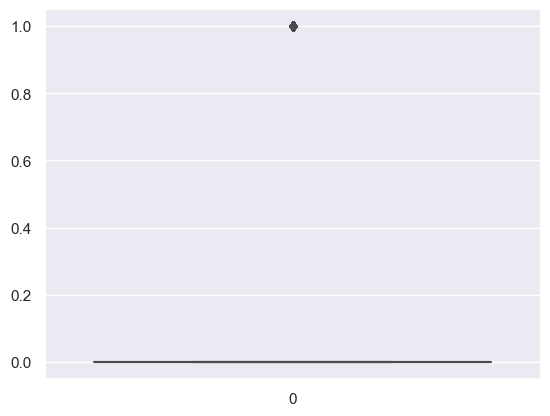

In [34]:
# Univariate Analysis of Numerical Variables in Train Dataset (Check Outliers)

# Dependent Numerical Variable
sns.boxplot(train['ind']);

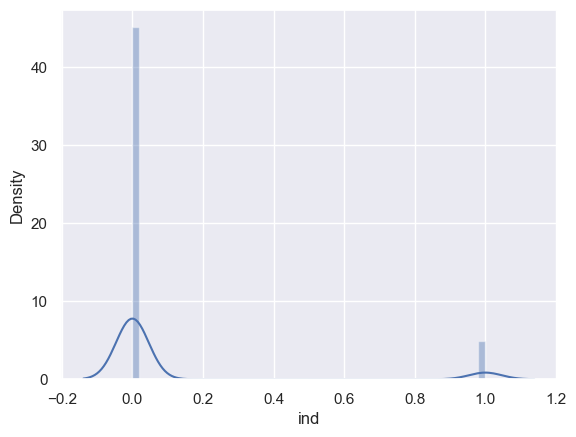

In [35]:
# Univariate Analysis of Numerical Variables in Train Dataset (Check Normality)

# Dependent Numerical Variable
sns.distplot(train['ind']);

In [36]:
# # Correlation matrix
# plt.figure(figsize=(15, 12))
# palette=sns.diverging_palette(20, 220, n=256)
# corr = train.corr(method='pearson')
# sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
# plt.title('Correlation Matrix', size=15, weight='bold');

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


In [37]:
train.isnull().sum()

ID             0
feature_0      0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
feature_6      0
feature_7      0
feature_8      0
feature_9      0
feature_10     0
feature_11     0
feature_12     0
feature_13     0
feature_14     0
feature_15     0
feature_16     0
feature_17     0
feature_18     0
feature_19     0
feature_20     0
feature_21     0
feature_22     0
feature_23     0
feature_24     0
feature_25     0
feature_26     0
feature_27     0
feature_28     0
feature_29     0
feature_30     0
feature_31     0
feature_32     0
feature_33     0
feature_34     0
feature_35     0
feature_36     0
feature_37     0
feature_38     0
feature_39     0
feature_40     0
feature_41     0
feature_42     0
feature_43     0
feature_44     0
feature_45     0
feature_46     0
feature_47     0
feature_48     0
feature_49     0
feature_50     0
feature_51     0
feature_52     0
feature_53     0
feature_54     0
feature_55     0
feature_56     0
feature_57    

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>


In [38]:
test.isnull().sum()

ID             0
feature_0      0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
feature_6      0
feature_7      0
feature_8      0
feature_9      0
feature_10     0
feature_11     0
feature_12     0
feature_13     0
feature_14     0
feature_15     0
feature_16     0
feature_17     0
feature_18     0
feature_19     0
feature_20     0
feature_21     0
feature_22     0
feature_23     0
feature_24     0
feature_25     0
feature_26     0
feature_27     0
feature_28     0
feature_29     0
feature_30     0
feature_31     0
feature_32     0
feature_33     0
feature_34     0
feature_35     0
feature_36     0
feature_37     0
feature_38     0
feature_39     0
feature_40     0
feature_41     0
feature_42     0
feature_43     0
feature_44     0
feature_45     0
feature_46     0
feature_47     0
feature_48     0
feature_49     0
feature_50     0
feature_51     0
feature_52     0
feature_53     0
feature_54     0
feature_55     0
feature_56     0
feature_57    

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Datatypes in Train and Test DataSet</h2>
</div>


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Columns: 772 entries, ID to ind
dtypes: float64(768), int64(4)
memory usage: 65.6 MB


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786 entries, 0 to 2785
Columns: 771 entries, ID to punc_num
dtypes: float64(768), int64(3)
memory usage: 16.4 MB


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Model Building</h2>
</div>


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Linear Discriminant Analysis applied to Undersampled Data using AllKNN</h2>
</div>

In [3]:
# Step 1.1:- Data Preprocessing for Model Building
X = train.drop('ind', axis=1)
y = train['ind']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y
                                                        , test_size=0.1
                                                        , random_state=42)

print("\nShape of X_train1 before removal of Non Predictive Features:-\n"
      ,X_train1.shape)
print("\nShape of X_test1 before removal of Non Predictive Features:-\n"
      ,X_test1.shape)
# --------------------------------------------------------------------------------#
# Step 1.2:- Set up ML Model
model1 = LinearDiscriminantAnalysis(covariance_estimator=None
                                    ,n_components=None
                                    ,priors=None
                                    ,shrinkage=0.0,solver='eigen'
                                    ,store_covariance=False
                                    ,tol=0.0001) 
# --------------------------------------------------------------------------------#

# Step 1.3:- Set up selector for feature selection 
sel = SelectBySingleFeaturePerformance(variables=None
                                       ,estimator=model1
                                       ,scoring="roc_auc"
                                       ,cv=3
                                       ,threshold=0.5)
# --------------------------------------------------------------------------------#

# Step 1.4:- Find Predictive Features
sel.fit(X_train1, y_train1)
# --------------------------------------------------------------------------------#

# Step 1.5:- Below transformer stores a dictionary 
# of feature:metric pairs
# in this case is the roc_auc of each individual model
sel.feature_performance_
# --------------------------------------------------------------------------------#

# Step 1.6:- Features that will be removed
len(sel.features_to_drop_)
# --------------------------------------------------------------------------------#

# Step 1.7:- Remove Non Predictive Features
X_train1 = sel.transform(X_train1)
X_test1 = sel.transform(X_test1)

print("\nShape of X_train1 after removal of Non Predictive Features:-\n"
      ,X_train1.shape)
print("\nShape of X_test1 after removal of Non Predictive Features:-\n"
      ,X_test1.shape)

# --------------------------------------------------------------------------------#

# Step 1.8:- Use of Undersampling Technique

allknn = AllKNN(
    sampling_strategy='auto'
    ,n_neighbors=1 # the maximum size of the neighbourhood that will be examined
    ,kind_sel='all' # most neighbours need to agree
    ,n_jobs=4)  

X_allknn, y_allknn = allknn.fit_resample(X_train1, y_train1)

# --------------------------------------------------------------------------------#

# Step 1.9:- Model1 construction: LDA with tuned hyperparameters
model1 = LinearDiscriminantAnalysis(covariance_estimator=None
                                    ,n_components=None
                                    ,priors=None
                                    ,shrinkage=0.0
                                    ,solver='eigen'
                                    ,store_covariance=False
                                    ,tol=0.0001) 

# --------------------------------------------------------------------------------#
# Step 1.10:- Train Model1 using undersampled data

model1.fit(X_allknn, y_allknn)
# --------------------------------------------------------------------------------#
print('\nTraining of Model1 is finished')

# Step 1.11:- Import Test data for the prediction of the Target Variable
test1 = test.copy()
test1 = sel.transform(test)
x_test = np.array(test1) 
# --------------------------------------------------------------------------------#

# Step 1.12:- Prediction using tuned model
y_pred1 = model1.predict_proba(x_test) #[Best F1 Score:-0.69592476]
# --------------------------------------------------------------------------------#
print('\nPrediction using Model1 Completed')


Shape of X_train1 before removal of Non Predictive Features:-
 (10029, 771)

Shape of X_test1 before removal of Non Predictive Features:-
 (1115, 771)

Shape of X_train1 after removal of Non Predictive Features:-
 (10029, 702)

Shape of X_test1 after removal of Non Predictive Features:-
 (1115, 702)

Training of Model1 is finished

Prediction using Model1 Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Linear Discriminant Analysis applied to Undersampled Data using TomekLinks</h2>
</div>

In [4]:
# Step 2.1:- Data Preprocessing for Model Building
X = train.drop('ind', axis=1)
y = train['ind']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y
                                                        ,test_size=0.1
                                                        ,random_state=42)

print("\nShape of X_train2 before removal of Non Predictive Features:-\n"
      ,X_train2.shape)
print("\nShape of X_test2 before removal of Non Predictive Features:-\n"
      ,X_test2.shape)

# --------------------------------------------------------------------------------#
# Step 2.2:- Set up ML Model

model2 = LinearDiscriminantAnalysis(covariance_estimator=None
                                    ,n_components=None
                                    ,priors=None
                                    ,shrinkage=0.0
                                    ,solver='eigen'
                                    ,store_covariance=False
                                    ,tol=0.0001) 

# --------------------------------------------------------------------------------#
# Step 2.3:- Set up selector for feature selection 
sel2 = SelectBySingleFeaturePerformance(variables=None
                                        ,estimator=model2
                                        ,scoring="roc_auc"
                                        ,cv=3
                                        ,threshold=0.5)

# --------------------------------------------------------------------------------#

# Step 2.4:- Find Predictive Features
sel2.fit(X_train2, y_train2)

# --------------------------------------------------------------------------------#

# Step 2.5:- Below transformer stores a dictionary 
# of feature:metric pairs
# in this case is the roc_auc of each individual model

sel2.feature_performance_

# --------------------------------------------------------------------------------#

# Step 2.6:- Features that will be removed
len(sel2.features_to_drop_)

# --------------------------------------------------------------------------------#

# Step 2.7:- Remove Non Predictive Features
X_train2 = sel2.transform(X_train2)
X_test2 = sel2.transform(X_test2)

print("\nShape of X_train2 after removal of Non Predictive Features:-\n"
      ,X_train2.shape)
print("\nShape of X_test2 after removal of Non Predictive Features:-\n"
      ,X_test2.shape)

# --------------------------------------------------------------------------------#

# Step 2.8:- Use of Undersampling Technique

tl = TomekLinks(sampling_strategy='auto'  # undersamples only the majority class
    ,n_jobs=4)  # I have 4 cores in my laptop

X_tl, y_tl = tl.fit_resample(X_train2, y_train2)

# --------------------------------------------------------------------------------#

# Step 2.9:- Model2 construction: LDA with tuned hyperparameters

model2 = LinearDiscriminantAnalysis(covariance_estimator=None
                                    ,n_components=None
                                    ,priors=None
                                    ,shrinkage=0.0
                                    ,solver='eigen'
                                    ,store_covariance=False
                                    ,tol=0.0001) 

# --------------------------------------------------------------------------------#
# Step 2.10:- Train Model2 using undersampled data

model2.fit(X_tl, y_tl)
# --------------------------------------------------------------------------------#
print('\nTraining of Model2 is finished')

# Step 2.11:- Import Test data for the prediction of the Target Variable
test2 = test.copy()
test2 = sel2.transform(test2)
x_test2 = np.array(test2) 
# --------------------------------------------------------------------------------#

# Step 2.12:- Prediction using tuned model
y_pred2 = model2.predict_proba(x_test2) #[Best F1 Score:-0.69811321]
# --------------------------------------------------------------------------------#
print('\nPrediction using Model2 Completed')


Shape of X_train2 before removal of Non Predictive Features:-
 (10029, 771)

Shape of X_test2 before removal of Non Predictive Features:-
 (1115, 771)

Shape of X_train2 after removal of Non Predictive Features:-
 (10029, 702)

Shape of X_test2 after removal of Non Predictive Features:-
 (1115, 702)

Training of Model2 is finished

Prediction using Model2 Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- Linear Discriminant Analysis applied to Undersampled Data using Neighbourhood Cleaning Rule</h2>
</div>

In [5]:
# Step 3.1:- Data Preprocessing for Model Building
X_train3 = train.drop('ind', axis=1)
y_train3 = train['ind']

# --------------------------------------------------------------------------------#

# Step 3.2:- Use of Undersampling Technique
ncr = NeighbourhoodCleaningRule(
        sampling_strategy='auto'# undersamples from all classes except minority
        ,n_neighbors=3 # explores 3 neighbours per observation
        ,kind_sel='all'# all / most neighbouring need to disagree, only applies to cleaning step
        ,n_jobs=4 # 4 processors in my laptop
        ,threshold_cleaning=0.1) # the threshold to evaluate a class for cleaning (used only for clearning step)

X_ncr, y_ncr = ncr.fit_resample(X_train3, y_train3)

# --------------------------------------------------------------------------------#
# Step 3.3:- Model3 construction: LDA with tuned hyperparameters

model3 = LinearDiscriminantAnalysis(covariance_estimator=None
                                    ,n_components=None
                                    ,priors=None
                                    ,shrinkage=0.0
                                    ,solver='eigen'
                                    ,store_covariance=False
                                    ,tol=0.0001) 

# --------------------------------------------------------------------------------#
# Step 3.4:- Train Model3 using undersampled data
    
model3.fit(X_ncr, y_ncr)

# --------------------------------------------------------------------------------#
print('\nTraining of Model3 is finished')

# Step 3.5:- Import Test data for the prediction of the Target Variable
test3 = test.copy()
x_test3 = np.array(test3) 
# --------------------------------------------------------------------------------#

# Step 3.6:- Prediction using tuned model
y_pred3 = model3.predict_proba(x_test3) #[Best F1 Score:-0.6873065]
# --------------------------------------------------------------------------------#
print('\nPrediction using Model3 Completed')


Training of Model3 is finished

Prediction using Model3 Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- Logistic Regression applied to Undersampled Data using One Sided Selection</h2>
</div>

In [6]:
# Step 4.1:- Data Preprocessing for Model Building
X_train4 = train.drop('ind', axis=1)
y_train4 = train['ind']

# --------------------------------------------------------------------------------#
# Step 4.2:- Use of Undersampling Technique

oss = OneSidedSelection(sampling_strategy='auto'
                        ,random_state=0
                        ,n_neighbors=1)

X_oss, y_oss = oss.fit_resample(X_train4, y_train4)

# --------------------------------------------------------------------------------#
# Step 4.3:- Model4 construction: Logistic Regression with tuned hyperparameters

model4 = LogisticRegression(C=0.056,class_weight={}
                            ,dual=False,fit_intercept=True
                            ,intercept_scaling=1,l1_ratio=None
                            ,max_iter=1000,multi_class='auto'
                            ,n_jobs=None,penalty='l2'
                            ,random_state=123,solver='lbfgs'
                            ,tol=0.0001,verbose=0
                            ,warm_start=False) 

# --------------------------------------------------------------------------------#
# Step 4.4:- Train Model4 using undersampled data
    
model4.fit(X_oss, y_oss)

# --------------------------------------------------------------------------------#
print('\nTraining of Model4 is finished')

# Step 4.5:- Import Test data for the prediction of the Target Variable
test4 = test.copy()
x_test4 = np.array(test4) 

# --------------------------------------------------------------------------------#
# Step 4.6:- Prediction using tuned model
y_pred4 = model4.predict_proba(x_test4) #[Best F1 Score:-0.66216216]
# --------------------------------------------------------------------------------#
print('\nPrediction using Model4 Completed')


Training of Model4 is finished

Prediction using Model4 Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- Logistic Regression applied to Undersampled Data using Edited Nearest Neighbours</h2>
</div>

In [7]:
# Step 5.1:- Data Preprocessing for Model Building
X_train5 = train.drop('ind', axis=1)
y_train5 = train['ind']

# --------------------------------------------------------------------------------#
# Step 5.2:- Use of Undersampling Technique

ENN = EditedNearestNeighbours(sampling_strategy='auto'
                              ,n_neighbors=3
                              ,kind_sel='all')

X_ENN, y_ENN = ENN.fit_resample(X_train5, y_train5)

# --------------------------------------------------------------------------------#
# Step 5.3:- Model5 construction: Logistic Regression with tuned hyperparameters

model5 = LogisticRegression(C=0.056, class_weight={}
                            ,dual=False,fit_intercept=True
                            ,intercept_scaling=1,l1_ratio=None
                            ,max_iter=1000,multi_class='auto'
                            ,n_jobs=None,penalty='l2'
                            ,random_state=123,solver='lbfgs'
                            ,tol=0.0001,verbose=0
                            ,warm_start=False) 

# --------------------------------------------------------------------------------#
# Step 5.4:- Train Model5 using undersampled data
    
model5.fit(X_ENN, y_ENN)

# --------------------------------------------------------------------------------#
print('\nTraining of Model5 is finished')

# Step 5.5:- Import Test data for the prediction of the Target Variable
test5 = test.copy()
x_test5 = np.array(test5) 
# --------------------------------------------------------------------------------#
# Step 5.6:- Prediction using tuned model
y_pred5 = model5.predict_proba(x_test5) #[Best F1 Score:-0.675]
# --------------------------------------------------------------------------------#
print('\nPrediction using Model5 Completed')


Training of Model5 is finished

Prediction using Model5 Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- Linear Discriminant Analysis applied to Undersampled Data using AllKNN</h2>
</div>

In [8]:
# Step 6.1:- Data Preprocessing for Model Building
X_train6 = train.drop('ind', axis=1)
y_train6 = train['ind']

# --------------------------------------------------------------------------------#
# Step 6.2:- Use of Undersampling Technique

AKNN = AllKNN(sampling_strategy='auto'
              ,n_neighbors=3
              ,kind_sel='all')

X_AKNN, y_AKNN = AKNN.fit_resample(X_train6, y_train6)

# --------------------------------------------------------------------------------#
# Step 6.3:- Model6 construction: LDA with tuned hyperparameters

model6 = LinearDiscriminantAnalysis(covariance_estimator=None
                                    ,n_components=None
                                    ,priors=None
                                    ,shrinkage='auto'
                                    ,solver='lsqr'
                                    ,store_covariance=False
                                    ,tol=0.0001) 

# --------------------------------------------------------------------------------#
# Step 6.4:- Train Model6 using undersampled data

model6.fit(X_AKNN, y_AKNN)

# --------------------------------------------------------------------------------#
print('Training of Model6 is finished')

# Step 6.5:- Import Test data for the prediction of the Target Variable
test6 = test.copy()
x_test6 = np.array(test6) 

# --------------------------------------------------------------------------------#
# Step 6.6:- Prediction using tuned model
y_pred6 = model6.predict_proba(x_test6) #[Best F1 Score:-0.69158879]
# --------------------------------------------------------------------------------#
print('\nPrediction using Model6 Completed')

Training of Model6 is finished

Prediction using Model6 Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 7- Linear Discriminant Analysis applied to Undersampled Data using Repeated Edited Nearest Neighbours</h2>
</div>

In [9]:
# Step 7.1:- Data Preprocessing for Model Building
X_train7 = train.drop('ind', axis=1)
y_train7 = train['ind']

# --------------------------------------------------------------------------------#
# Step 7.2:- Use of Undersampling Technique

RENNN = RepeatedEditedNearestNeighbours(sampling_strategy='auto'
                                        ,n_neighbors=3
                                        ,kind_sel='all'
                                        ,max_iter=100)

X_RENNN, y_RENNN = RENNN.fit_resample(X_train7, y_train7)

# --------------------------------------------------------------------------------#
# Step 7.3:- Model7 construction: LDA with tuned hyperparameters

model7 = LinearDiscriminantAnalysis(covariance_estimator=None
                                    ,n_components=None
                                    ,priors=None
                                    ,shrinkage='auto'
                                    ,solver='lsqr'
                                    ,store_covariance=False
                                    ,tol=0.0001)

# --------------------------------------------------------------------------------#
# Step 7.4:- Train Model7 using undersampled data

model7.fit(X_RENNN, y_RENNN)

# --------------------------------------------------------------------------------#
print('\nTraining of Model7 is finished')

# Step 7.5:- Import Test data for the prediction of the Target Variable
test7 = test.copy()
x_test7 = np.array(test7) 
# --------------------------------------------------------------------------------#
# Step 7.6:- Prediction using tuned model
y_pred7 = model7.predict_proba(x_test7) #[Best F1 Score:-0.6911315]
# --------------------------------------------------------------------------------#
print('\nPrediction using Model7 Completed')


Training of Model7 is finished

Prediction using Model7 Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 8- Linear Discriminant Analysis applied to Undersampled Data using Edited Nearest Neighbours</h2>
</div>

In [10]:
# Step 8.1:- Data Preprocessing for Model Building
X_train8 = train.drop('ind', axis=1)
y_train8 = train['ind']

# --------------------------------------------------------------------------------#
# Step 8.2:- Use of Undersampling Technique

ENN1 = EditedNearestNeighbours(sampling_strategy='auto'
                               ,n_neighbors=3
                               ,kind_sel='all')

X_ENN1, y_ENN1 = ENN1.fit_resample(X_train8, y_train8)

# --------------------------------------------------------------------------------#
# Step 8.3:- Model8 construction: LDA with tuned hyperparameters

model8 = LinearDiscriminantAnalysis(covariance_estimator=None
                                    ,n_components=None
                                    ,priors=None
                                    ,shrinkage='auto'
                                    ,solver='lsqr'
                                    ,store_covariance=False
                                    ,tol=0.0001) 

# --------------------------------------------------------------------------------#
# Step 8.4:- Train Model8 using undersampled data

model8.fit(X_ENN1, y_ENN1)

# --------------------------------------------------------------------------------#
print('\nTraining of Model8 is finished')

# Step 8.5:- Import Test data for the prediction of the Target Variable
test8 = test.copy()
x_test8 = np.array(test8) 
# --------------------------------------------------------------------------------#
# Step 8.6:- Prediction using tuned model
y_pred8 = model8.predict_proba(x_test8) #[Best F1 Score:-0.6918239]
# --------------------------------------------------------------------------------#
print('\nPrediction using Model8 Completed')


Training of Model8 is finished

Prediction using Model8 Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 9- Integration of Linear Discriminant Analysis into a Bagging Classifier applied to the Undersampled Data using Repeated Edited Nearest Neighbours</h2>
</div>

In [11]:
# Step 9.1:- Data Preprocessing for Model Building
X_train9 = train.drop('ind', axis=1)
y_train9 = train['ind']

# --------------------------------------------------------------------------------#
# Step 9.2:- Use of Undersampling Technique

RENN1 = RepeatedEditedNearestNeighbours(sampling_strategy='auto'
                                        ,n_neighbors=1
                                        ,kind_sel='all'
                                        ,max_iter=100)

X_RENN1, y_RENN1 = RENN1.fit_resample(X_train9, y_train9)

# --------------------------------------------------------------------------------#
# Step 9.3:- Model9 construction: LDA with tuned hyperparameters

base_classifier = LinearDiscriminantAnalysis(covariance_estimator=None
                                             ,n_components=None
                                             ,priors=None
                                             ,shrinkage='auto'
                                             ,solver='lsqr'
                                             ,store_covariance=False
                                             ,tol=0.0001)

model9 = BaggingClassifier(base_classifier) 

# --------------------------------------------------------------------------------#
# Step 9.4:- Train Model9 using undersampled data

model9.fit(X_RENN1, y_RENN1)

# --------------------------------------------------------------------------------#
print('\nTraining of Model9 is finished')

# Step 9.5:- Import Test data for the prediction of the Target Variable
test9 = test.copy()
x_test9 = np.array(test9) 
# --------------------------------------------------------------------------------#
# Step 9.6:- Prediction using tuned model
y_pred9 = model9.predict_proba(x_test9) #[Best F1 Score:-0.68608414]
# --------------------------------------------------------------------------------#
print('\nPrediction using Model9 Completed')


Training of Model9 is finished

Prediction using Model9 Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 10- Integration of Linear Discriminant Analysis into a Bagging Classifier applied to the Undersampled Data using Edited Nearest Neighbours</h2>
</div>

In [12]:
# Step 10.1:- Data Preprocessing for Model Building
X_train10 = train.drop('ind', axis=1)
y_train10 = train['ind']

# --------------------------------------------------------------------------------#
# Step 10.2:- Use of Undersampling Technique

ENN11 = EditedNearestNeighbours(sampling_strategy='auto'
                                ,n_neighbors=3
                                ,kind_sel='all')

X_ENN11, y_ENN11 = ENN11.fit_resample(X_train10, y_train10)

# --------------------------------------------------------------------------------#
# Step 10.3:- Model10 construction: LDA with tuned hyperparameters
base_classifier = LinearDiscriminantAnalysis(covariance_estimator=None
                                             ,n_components=None
                                             ,priors=None
                                             ,shrinkage='auto'
                                             ,solver='lsqr'
                                             ,store_covariance=False
                                             ,tol=0.0001)

model10 = BaggingClassifier(base_classifier) 

# --------------------------------------------------------------------------------#
# Step 10.4:- Train Model10 using undersampled data
model10.fit(X_ENN11, y_ENN11)

# --------------------------------------------------------------------------------#
print('\nTraining of Model10 is finished')

# Step 10.5:- Import Test data for the prediction of the Target Variable
test10 = test.copy()
x_test10 = np.array(test10) 
# --------------------------------------------------------------------------------#
# Step 10.6:- Prediction using tuned model
y_pred10 = model10.predict_proba(x_test10) #[Best F1 Score:-0.67092652]
# --------------------------------------------------------------------------------#
print('\nPrediction using Model10 Completed')


Training of Model10 is finished

Prediction using Model10 Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 11- Integration of Linear Discriminant Analysis into a Bagging Classifier applied to the Undersampled Data using AllKNN</h2>
</div>

In [13]:
# Step 11.1:- Data Preprocessing for Model Building
X_train11 = train.drop('ind', axis=1)
y_train11 = train['ind']

# --------------------------------------------------------------------------------#
# Step 11.2:- Use of Undersampling Technique
AKNN43 = AllKNN(sampling_strategy='auto'
                ,n_neighbors=1
                ,kind_sel='all')

X_AKNN43, y_AKNN43 = AKNN43.fit_resample(X_train11, y_train11)

# --------------------------------------------------------------------------------#
# Step 11.3:- Model11 construction: LDA with tuned hyperparameters

base_classifier = LinearDiscriminantAnalysis(covariance_estimator=None
                                             ,n_components=None
                                             ,priors=None, shrinkage='auto'
                                             ,solver='lsqr'
                                             ,store_covariance=False
                                             ,tol=0.0001)

model11 = BaggingClassifier(base_classifier) 

# --------------------------------------------------------------------------------#
# Step 11.4:- Train Model11 using undersampled data
model11.fit(X_AKNN43, y_AKNN43)

# --------------------------------------------------------------------------------#
print('\nTraining of Model11 is finished')

# Step 11.5:- Import Test data for the prediction of the Target Variable
test11 = test.copy()
x_test11 = np.array(test11) 
# --------------------------------------------------------------------------------#
# Step 11.6:- Prediction using tuned model
y_pred11 = model11.predict_proba(x_test11) #[Best F1 Score:-0.67973856]
# --------------------------------------------------------------------------------#
print('\nPrediction using Model11 Completed')


Training of Model11 is finished

Prediction using Model11 Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 12- Integration of Logistic Regression into a Bagging Classifier applied to the Undersampled Data using TomekLinks</h2>
</div>

In [14]:
# Step 12.1:- Data Preprocessing for Model Building
X_train12 = train.drop('ind', axis=1)
y_train12 = train['ind']

# --------------------------------------------------------------------------------#
# Step 12.2:- Use of Undersampling Technique
TL88 = TomekLinks(sampling_strategy='auto')

X_TL88, y_TL88 = TL88.fit_resample(X_train12, y_train12)

# --------------------------------------------------------------------------------#
# Step 12.3:- Model12 construction: LDA with tuned hyperparameters

base_classifier = LogisticRegression(C=0.056,class_weight={}
                                     ,dual=False,fit_intercept=True
                                     ,intercept_scaling=1,l1_ratio=None
                                     ,max_iter=1000,multi_class='auto'
                                     ,n_jobs=None,penalty='l2'
                                     ,random_state=123,solver='lbfgs'
                                     ,tol=0.0001,verbose=0
                                     ,warm_start=False)

model12 = BaggingClassifier(base_classifier) 

# --------------------------------------------------------------------------------#
# Step 12.4:- Train Model12 using undersampled data

model12.fit(X_TL88, y_TL88)
# --------------------------------------------------------------------------------#
print('\nTraining of Model12 is finished')

# Step 12.5:- Import Test data for the prediction of the Target Variable
test12 = test.copy()
x_test12 = np.array(test12) 
# --------------------------------------------------------------------------------#
# Step 12.6:- Prediction using tuned model
y_pred12 = model12.predict_proba(x_test12) #[Best F1 Score:-0.65551839]
# --------------------------------------------------------------------------------#
print('\nPrediction using Model12 Completed')


Training of Model12 is finished

Prediction using Model12 Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Advanced Ensemble Technique</h2>
</div>

#### * Ensemble Technique 1

In [15]:
# Step 1
predictions = list()
cb_weight=0.50 
lb_weight=0.50 
# --------------------------------------------------------------------------------#

# Step 2
for i, j in zip(y_pred1, y_pred2):
    xx = [(cb_weight * i[0]) + (lb_weight * j[0]),
          (cb_weight * i[1]) + (lb_weight * j[1])]
    predictions.append(xx)

preds_ensemble1=np.argmax(predictions,axis=1)
y_pred13 = preds_ensemble1 # [Best F1 Score:-0.7]

# --------------------------------------------------------------------------------#
print('Prediction using Ensemble Technique 1 Completed')

Prediction using Ensemble Technique 1 Completed


#### * Ensemble Technique 2

In [16]:
# Step 1
predictions = list()
cb_weight=0.25
lb_weight=0.25 
ab_weight=0.25 
cd_weight=0.25 

# --------------------------------------------------------------------------------#
# Step 2
for i, j, k, m in zip(y_pred1, y_pred2,y_pred8,y_pred6):
    xx = [(cb_weight * i[0]) + 
          (lb_weight * j[0]) +
          (ab_weight * k[0]) + 
          (cd_weight * m[0]),
          (cb_weight * i[1]) + 
          (lb_weight * j[1]) + 
          (ab_weight * k[1]) + 
          (cd_weight * m[1])]
    predictions.append(xx)

preds_ensemble2=np.argmax(predictions,axis=1)
y_pred14 = preds_ensemble2 # [Best F1 Score:-0.6984127]
# --------------------------------------------------------------------------------#
print('Prediction using Ensemble Technique 2 Completed')

Prediction using Ensemble Technique 2 Completed


#### * Ensemble Technique 3

In [17]:
# Step 1
predictions = list()
cb_weight=0.40
lb_weight=0.40 
ab_weight=0.10 
cd_weight=0.10 

# --------------------------------------------------------------------------------#
# Step 2
for i, j, k, m in zip(y_pred1, y_pred2,y_pred8,y_pred6):
    xx = [(cb_weight * i[0]) + 
          (lb_weight * j[0]) +
          (ab_weight * k[0]) + 
          (cd_weight * m[0]),
          (cb_weight * i[1]) + 
          (lb_weight * j[1]) + 
          (ab_weight * k[1]) + 
          (cd_weight * m[1])]
    predictions.append(xx)

preds_ensemble3=np.argmax(predictions,axis=1)

y_pred15 = preds_ensemble3 # [Best F1 Score:-0.70662461]
# --------------------------------------------------------------------------------#
print('Prediction using Ensemble Technique 3 Completed')

Prediction using Ensemble Technique 3 Completed


#### * Ensemble Technique 4

In [18]:
# Step 1:- Check shapes
print(y_pred13.shape, y_pred14.shape, y_pred15.shape, y_pred1.shape)

# Step 2:- Equal weights for each model
weight_y_pred_E1 = 0.25
weight_y_pred_E2 = 0.25
weight_y_pred_E3 = 0.25
weight_y_pred1 = 0.25

# Step 3:- Combine predictions using weights
ensemble_prediction = np.zeros_like(y_pred1)  

# Step 4:- Add weighted predictions
ensemble_prediction[:, 0] = (weight_y_pred_E1 * y_pred13 + 
                             weight_y_pred_E2 * y_pred14 + 
                             weight_y_pred_E3 * y_pred15 + 
                             weight_y_pred1 * y_pred1[:, 0])

ensemble_prediction[:, 1] = (weight_y_pred_E1 * y_pred13 + 
                             weight_y_pred_E2 * y_pred14 + 
                             weight_y_pred_E3 * y_pred15 + 
                             weight_y_pred1 * y_pred1[:, 1])

# Step 5:- Apply a threshold or use argmax to get the final prediction
final_prediction = np.argmax(ensemble_prediction, axis=1)
y_pred16 = final_prediction #[Best F1 Score:-0.69592476]
# --------------------------------------------------------------------------------#
print('Prediction using Ensemble Technique 4 Completed')

(2786,) (2786,) (2786,) (2786, 2)
Prediction using Ensemble Technique 4 Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [ ]:
# In the hackathon, participants can choose up to two final submissions
# Therefore, I will use the outputs of the following 
# two ensemble models for my final submissions.


# Final Submission 1 using "Ensemble Technique 3"
df1=pd.DataFrame(y_pred15,columns=['ind'])
submission1 = sub.drop(['ind'], axis=1)
final_pred = pd.concat([submission1,df1], axis=1) 
path = r'C:\Users\abdat\Favorites\Hackathon\BTGT\Text-Classify-Challenge-Nov23-Jan24\Pred-2-Upload'
final_pred.to_csv(os.path.join(path, 'Best_Submission1_ABarphe.csv'), index=False)

# Final Submission 2 using "Ensemble Technique 1"
df2=pd.DataFrame(y_pred13,columns=['ind'])
submission2 = sub.drop(['ind'], axis=1)
final_pred = pd.concat([submission2,df2], axis=1) 
path = r'C:\Users\abdat\Favorites\Hackathon\BTGT\Text-Classify-Challenge-Nov23-Jan24\Pred-2-Upload'
final_pred.to_csv(os.path.join(path, 'Best_Submission2_ABarphe.csv'), index=False)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

**Best Submission F1 Score:**

**1) Private Leaderboard :-** 0.78703704

**2) Public Leaderboard :-** 0.70662461 & 0.7

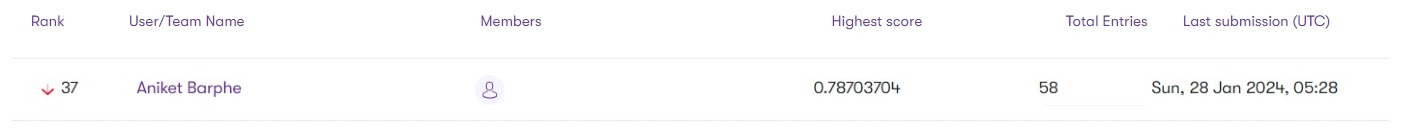

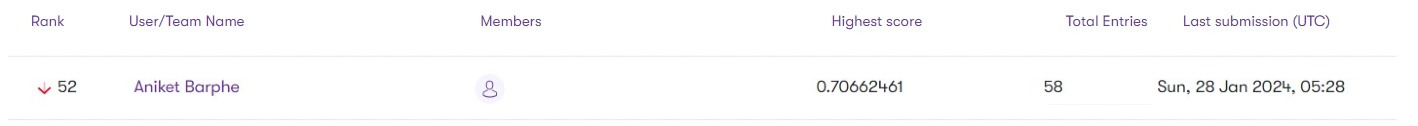

**Competition Link:-** 

https://bitgrit.net/competition/19

**Rank Scored:-**

a) **52** out of **303** registered participants (Public Leaderboard)

b) **37** out of **303** registered participants (Private Leaderboard)